# Natural Language Processing with Disaster Tweets - Lept1

In [1]:
import sys

MODULE_FULL_PATH = '/home/leptone/Libraries'

sys.path.insert(1, MODULE_FULL_PATH)

from library import *

In [2]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/disaster', width=700, height=500)

## Load Data

In [4]:
train_data=pd.read_csv("train.csv", encoding="utf8")
test_data=pd.read_csv("test.csv", encoding="utf8")

In [54]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# of samples in train =  7613
# of samples in test =  3263


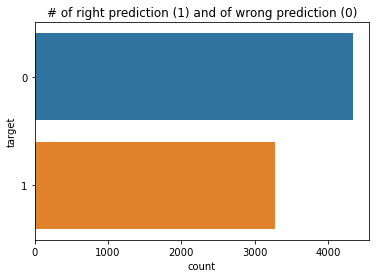

In [24]:
print('# of samples in train = ', train_data.id.unique().shape[0])
sns.countplot(y='target',data=train_data).set_title('# of right prediction (1) and of wrong prediction (0)')
print('# of samples in test = ', test_data.id.unique().shape[0])


In [41]:
print('# of samples with location in train = ', train_data.location.notnull().sum())
print('# of unique location in train = ', train_data.location.unique().shape[0])
print('# of NaN location in train = ', train_data.location.isnull().sum())
print('  ')
print('# of samples with location in test = ', test_data.location.notnull().sum())
print('# of unique location in test = ', test_data.location.unique().shape[0])
print('# of NaN location in test = ', test_data.location.isnull().sum())

# of samples with location in train =  5080
# of unique location in train =  3342
# of NaN location in train =  2533
  
# of samples with location in test =  2158
# of unique location in test =  1603
# of NaN location in test =  1105


In [43]:
print('# of samples with keyword in train = ', train_data.keyword.notnull().sum())
print('# of unique keyword in train = ', train_data.keyword.unique().shape[0])
print('# of NaN keyword in train = ', train_data.keyword.isnull().sum())
print('  ')
print('# of samples with keyword in test = ', test_data.keyword.notnull().sum())
print('# of unique keyword in test = ', test_data.keyword.unique().shape[0])
print('# of NaN keyword in test = ', test_data.keyword.isnull().sum())

# of samples with keyword in train =  7552
# of unique keyword in train =  222
# of NaN keyword in train =  61
  
# of samples with keyword in test =  3237
# of unique keyword in test =  222
# of NaN keyword in test =  26


I think 'keyword' and 'location' are not so important. But I am trying to impute NaN values and then use them.

In [55]:
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(train_data)

SimpleImputer(strategy='most_frequent')

In [56]:
X=imputer.transform(train_data)

In [63]:
train_data_imputed=pd.DataFrame(X, columns = train_data.columns)
train_data_imputed.head()

,id,keyword,location,text,target
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1


### Load the Target

In [23]:
y = train_data['target']

### Extract features from text

In [86]:
import nltk
import string
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
import string 

In [83]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leptone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
my_stopwords=(stopwords.words('english'))+["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo']

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        tokens = word_tokenize(articles)
        tokens = [i for i in tokens if i not in my_stopwords]
        tokens = [self.wnl.lemmatize(t) for t in tokens]
        #print (tokens)
        return tokens

    
class StemTokenizer(object):
    def __init__(self):
        self.wnl = PorterStemmer()
    def __call__(self, articles):
        tokens = word_tokenize(articles)
        tokens = [i for i in tokens if i not in my_stopwords]
        tokens = [self.wnl.stem(t) for t in tokens]
        #print (tokens)
        return tokens


In [89]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leptone/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [99]:
def extract_text(mess):
    new_mess=''
    text = str(mess)
    clean = re.sub(r'''[,.;@#?:!&$*"']+ \ * '''," ", text, flags=re.VERBOSE)
    new_mess +=''.join(clean)
    return new_mess

In [102]:
tweets= train_data['text']
tweets=tweets.apply(extract_text)
tweets= train_data['text'].to_numpy()
cntvec = CountVectorizer(tokenizer=StemTokenizer(),analyzer='word',stop_words=my_stopwords)
C = cntvec.fit_transform(tweets)
tfidf = TfidfTransformer(sublinear_tf=True)

In [103]:
X_text = tfidf.fit_transform(C)

In [104]:
X_text.shape

(7613, 19978)

In [ ]:
# adesso bisogna unire alla matrice X_text le feature location e keyword

### Model selection

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,ComplementNB